<a href="https://www.kaggle.com/code/samithsachidanandan/time-series-forecasting-with-sarima?scriptVersionId=300454543" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import holidays

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller



import warnings
warnings.filterwarnings('ignore')


In [2]:
df =pd.read_csv('/kaggle/input/german-power-consumption/power_consumption_germany.csv',index_col=0,
    parse_dates=True)

In [3]:
df.index = pd.to_datetime(df.index, utc=True).tz_convert('Europe/Berlin')

In [4]:
df.head()

,load_Actual Load,wind_and_solar_forecast_Solar,wind_and_solar_forecast_Wind Offshore,wind_and_solar_forecast_Wind Onshore,intraday_wind_and_solar_forecast_Solar,intraday_wind_and_solar_forecast_Wind Offshore,intraday_wind_and_solar_forecast_Wind Onshore,generation_Biomass_Actual Aggregated,generation_Biomass_Actual Consumption,generation_Fossil Brown coal/Lignite_Actual Aggregated,...,generation_import_Import_PL,generation_import_Import_SE_4,generation_import_Import_SI,generation_import_Import_sum,import_BE,generation_import_Import_BE,import_AT,generation_import_Import_AT,import_NO_2,generation_import_Import_NO_2
2015-01-01 00:00:00+01:00,51873.64,0.0,258.0,7517.70,0.0,219.0,3713.0,5014.84,0.0,15858.61,...,NaN,0.0,0.0,3001.04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:15:00+01:00,51382.96,0.0,258.0,7603.26,0.0,219.0,3789.0,5020.28,0.0,15803.40,...,NaN,0.0,0.0,3001.04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:30:00+01:00,51444.18,0.0,259.0,7695.36,0.0,218.5,3866.0,5016.53,0.0,15649.47,...,NaN,0.0,0.0,3001.04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:45:00+01:00,51268.75,0.0,259.0,7779.20,0.0,218.5,3942.0,5006.21,0.0,15437.69,...,NaN,0.0,0.0,3001.04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+01:00,50869.89,0.0,259.0,8108.18,0.0,218.5,4175.5,4978.48,0.0,15552.28,...,NaN,0.0,0.0,3179.07,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380594 entries, 2015-01-01 00:00:00+01:00 to 2026-02-25 00:30:00+01:00
Data columns (total 87 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   load_Actual Load                                               380574 non-null  float64
 1   wind_and_solar_forecast_Solar                                  380582 non-null  float64
 2   wind_and_solar_forecast_Wind Offshore                          380498 non-null  float64
 3   wind_and_solar_forecast_Wind Onshore                           380582 non-null  float64
 4   intraday_wind_and_solar_forecast_Solar                         380594 non-null  float64
 5   intraday_wind_and_solar_forecast_Wind Offshore                 380594 non-null  float64
 6   intraday_wind_and_solar_forecast_Wind Onshore                  380456 non-null  float64
 7   g

In [6]:
df.index.min(), df.index.max()

(Timestamp('2015-01-01 00:00:00+0100', tz='Europe/Berlin'),
 Timestamp('2026-02-25 00:30:00+0100', tz='Europe/Berlin'))

In [7]:
df['load_Actual Load'].isnull().sum()

np.int64(20)

In [8]:
missing = pd.DataFrame({
    "missing_count": df.isnull().sum(),
    "missing_pct": (df.isnull().sum() / len(df) * 100).round(2),
    "present_count": df.notnull().sum(),
})
missing = missing.sort_values("missing_pct", ascending=False)
missing = missing[missing["missing_pct"]>0]
missing

,missing_count,missing_pct,present_count
import_IT_NORD,355416,93.38,25178
import_IT_NORD_AT,355088,93.30,25506
import_SI,347808,91.39,32786
generation_Fossil Coal-derived gas_Actual Consumption,275952,72.51,104642
generation_import_Import_IT_NORD_AT,275657,72.43,104937
generation_Fossil Brown coal/Lignite_Actual Consumption,275657,72.43,104937
import_SE_4,275451,72.37,105143
generation_Nuclear_Actual Consumption,271655,71.38,108939
import_FR,263545,69.25,117049
generation_Waste_Actual Consumption,249549,65.57,131045


## Exploratory Data Analysis

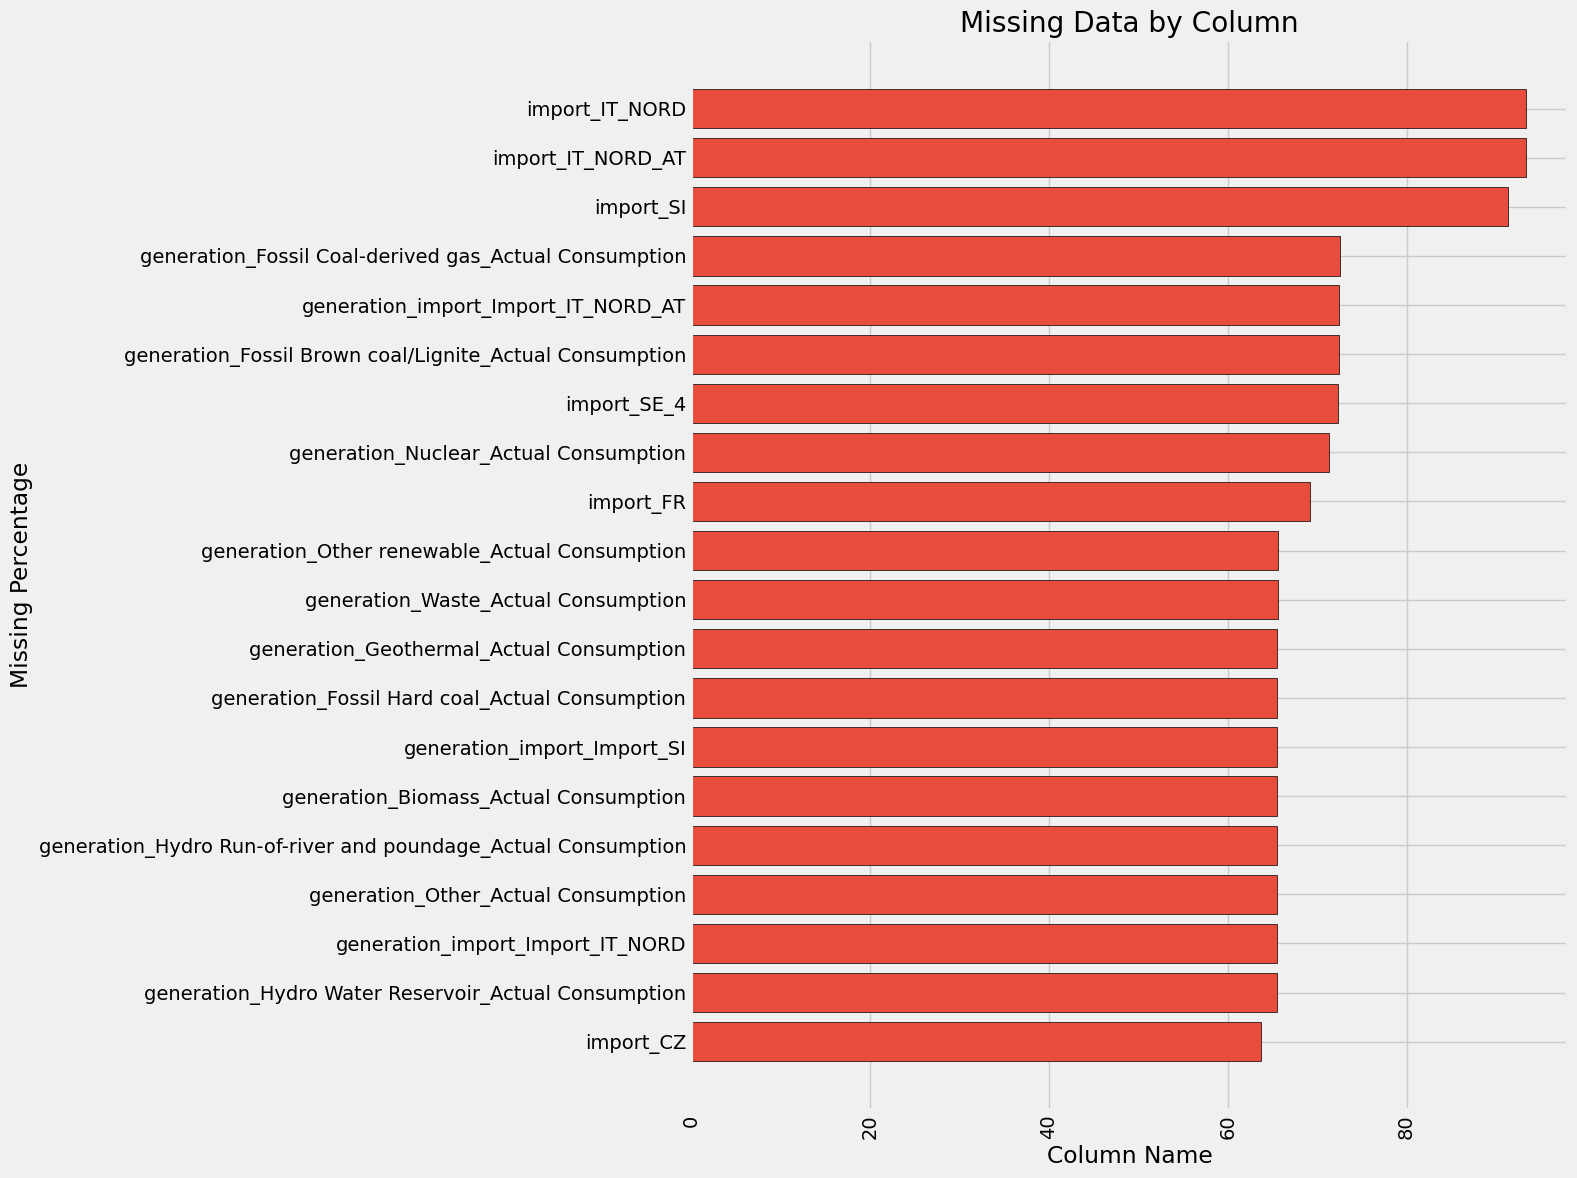

In [9]:
plt.figure(figsize=(16, 12))
top_missing = missing[missing["missing_pct"] > 0].head(20)
top_missing_sorted = top_missing.sort_values('missing_pct', ascending=True)
plt.barh(top_missing_sorted.index, top_missing_sorted["missing_pct"], color='#e74c3c', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Column Name")
plt.ylabel("Missing Percentage")
plt.title("Missing Data by Column")
plt.tight_layout()
plt.show()

We need to decide whether we need to keep these columns or not. Very high percentage of data is missing. 

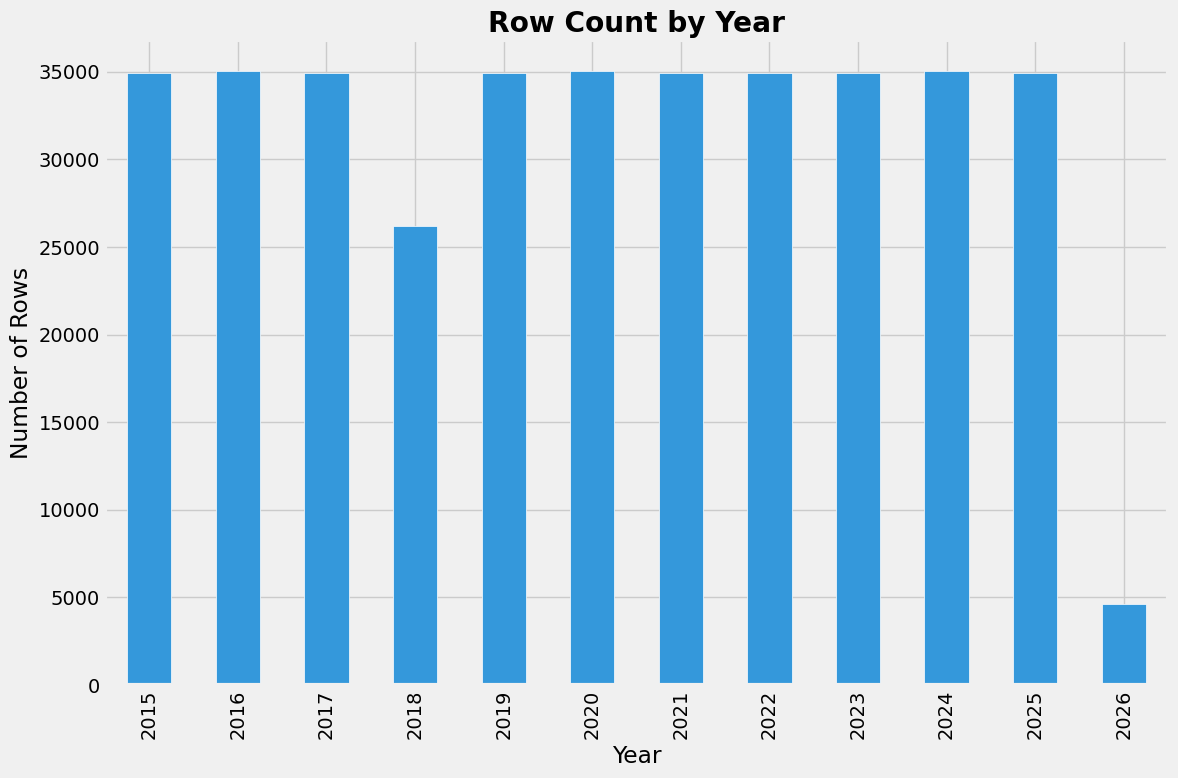

In [10]:
df_year = df.copy()
df_year['year'] = df_year.index.year
year_counts = df_year.groupby("year").size()

fig = plt.figure(figsize=(12, 8))
year_counts.plot(kind="bar", color="#3498db", edgecolor="white")
plt.xlabel("Year")
plt.ylabel("Number of Rows")    
plt.title("Row Count by Year", fontweight="bold")
plt.tight_layout()
plt.show()

This plot confirms that dataset is having no details for the later period of 2018. 

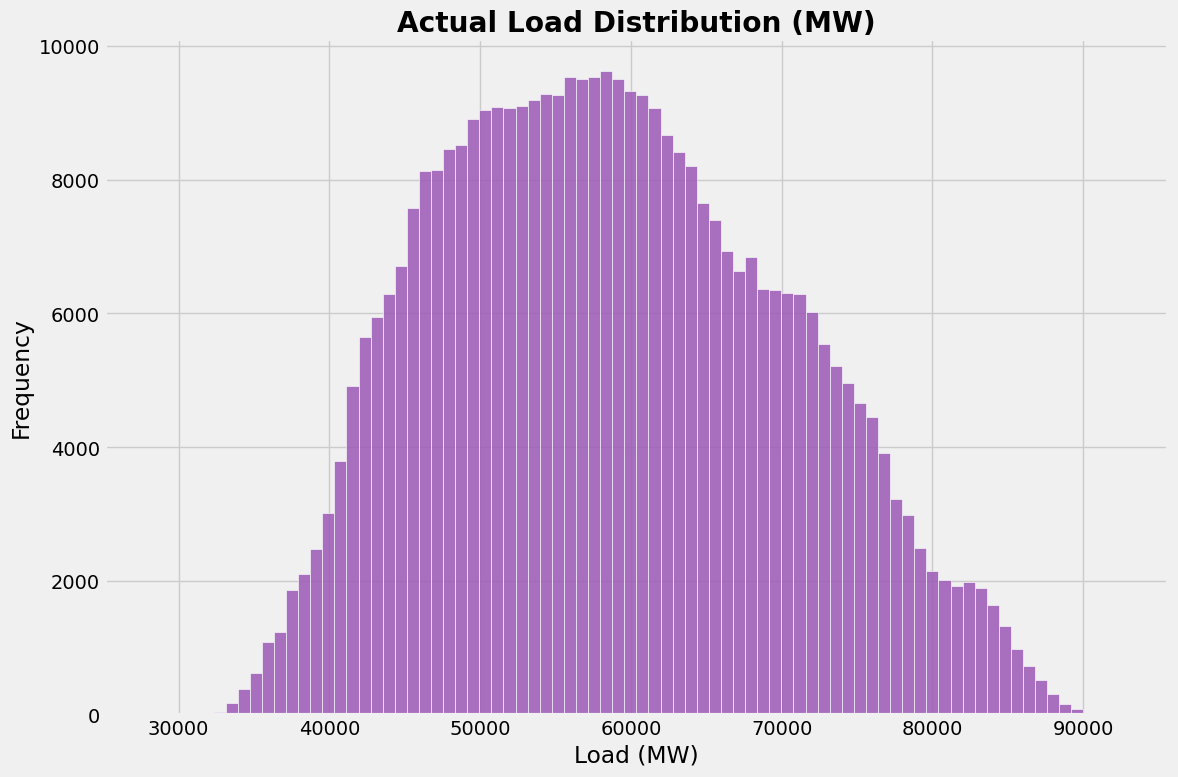

In [11]:
plt.figure(figsize=(12, 8))

df["load_Actual Load"].dropna().hist(bins=80, color="#9b59b6", edgecolor="white", alpha=0.85)
plt.xlabel("Load (MW)")
plt.ylabel("Frequency")
plt.title("Actual Load Distribution (MW)", fontweight="bold")
plt.tight_layout()
plt.show()

Load demand is relatively stable over years with natural seasonal variation

In [12]:
df.rename(columns={'load_Actual Load': 'actual_load'}, inplace=True)
TARGET = "actual_load"

df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['time_of_day'] = df['hour'] + df['minute']/60
df['month'] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["year"]        = df.index.year
df["is_weekend"]  = df.index.dayofweek >= 5

DAY_NAMES   = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
MONTH_NAMES = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

sns.set_theme(style="whitegrid", palette="muted")

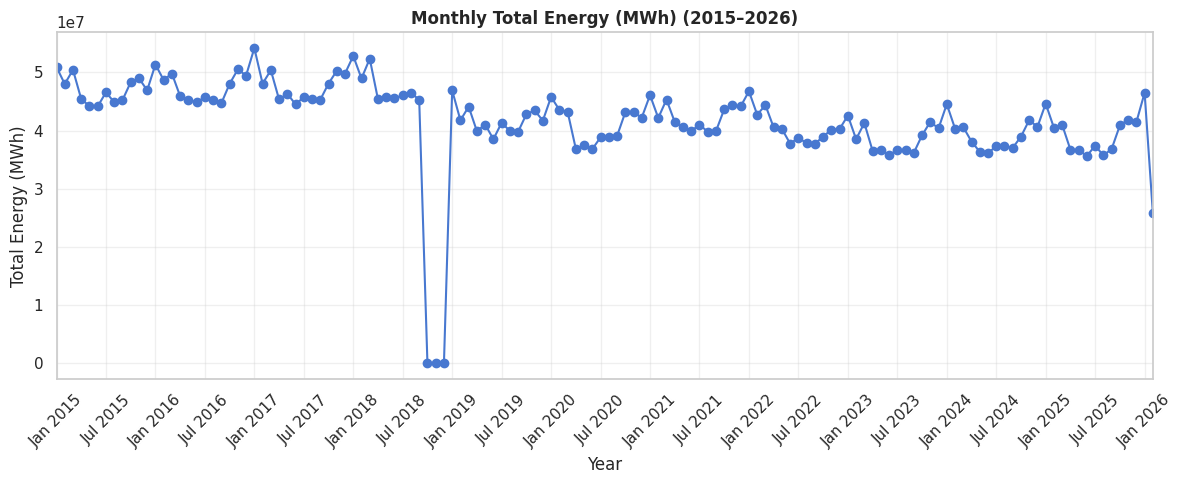

In [13]:
monthly_energy  = (df['actual_load'].resample('ME').sum().mul(0.25))

plt.figure(figsize=(12,5))

ax = monthly_energy.plot(marker='o')

ax.set_title("Monthly Total Energy (MWh) (2015–2026)", fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Total Energy (MWh)")
ax.grid(alpha=0.3)


ax.set_xticks(monthly_energy.index[::6]) 
ax.set_xticklabels(
    monthly_energy.index.strftime('%b %Y')[::6],
    rotation=45
)

plt.tight_layout()
plt.show()

Monthly total energy generally fluctuates between about 40–50 million MWh, with a mild seasonal pattern and no strong long‑term upward or downward trend overall. There is a sharp data anomaly around mid‑2018 where the energy value drops to nearly zero for a couple of months, suggesting missing or erroneous data rather than a real system change. After 2019, the variability appears slightly lower and the series stabilizes in the low‑40 million MWh range, with occasional peaks but no sustained growth or decline through early 2026

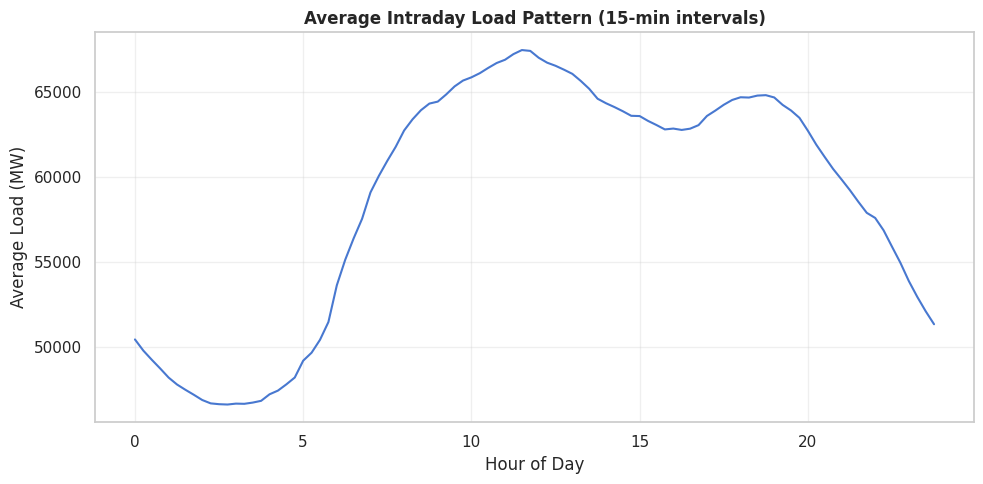

In [14]:

daily_pattern = df.groupby('time_of_day')['actual_load'].mean()

plt.figure(figsize=(10,5))
daily_pattern.plot()

plt.title("Average Intraday Load Pattern (15-min intervals)", fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Average Load (MW)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This indicates a typical workday pattern with strong daytime demand and lighter overnight usage.


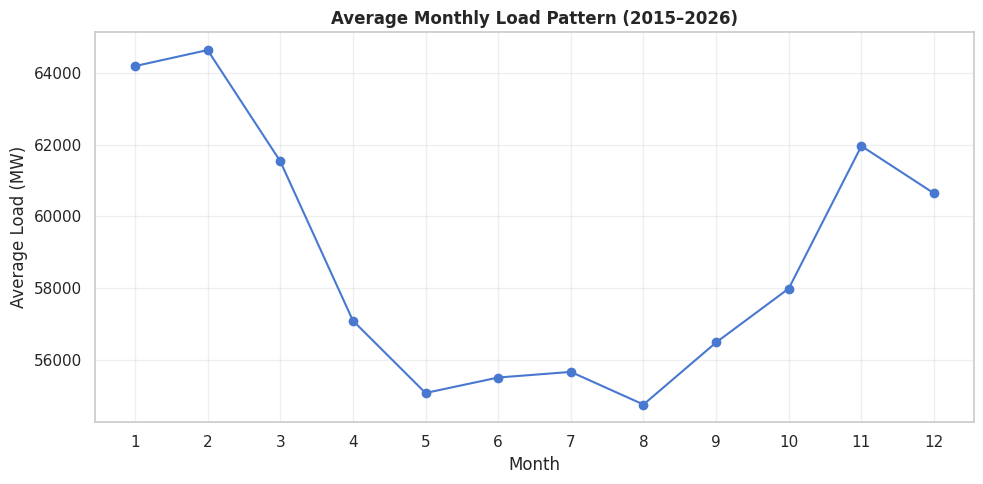

In [15]:


monthly_seasonality = (
    df.groupby('month')['actual_load']
      .mean()
)

plt.figure(figsize=(10,5))
monthly_seasonality.plot(marker='o')

plt.title("Average Monthly Load Pattern (2015–2026)", fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Average Load (MW)")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This indicates a seasonal pattern. Usage is high in the month of Jan- Feb and it is lowest during the Month May -Aug and gradually increasing towards Nov. 

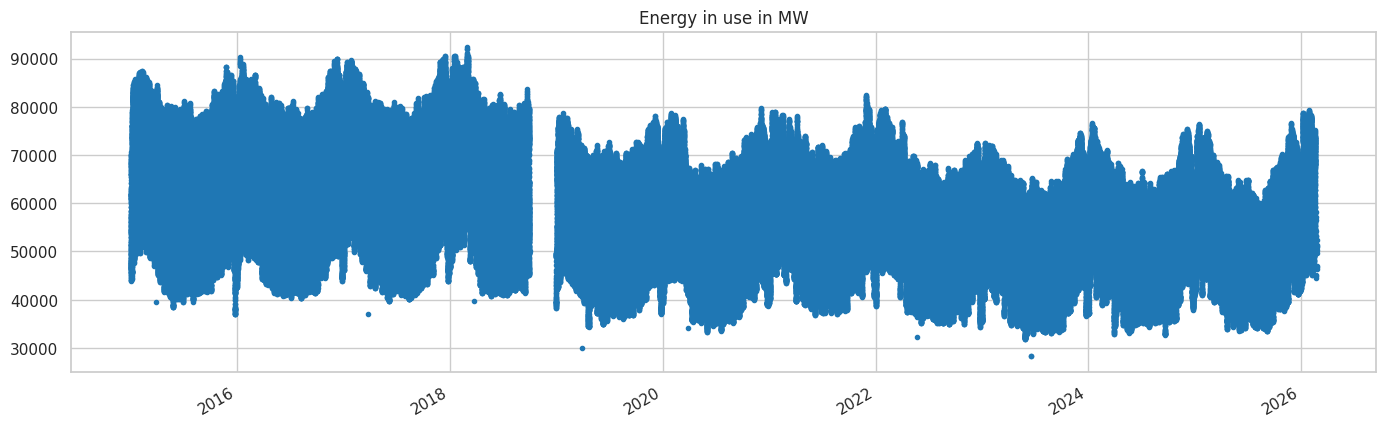

In [16]:
df['actual_load'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Energy in use in MW')
plt.show()

This clearly shows there is structural break from Jan 2019  and data is missing in 2018 end. Missing is mostly from oct 2018 - dec 2018

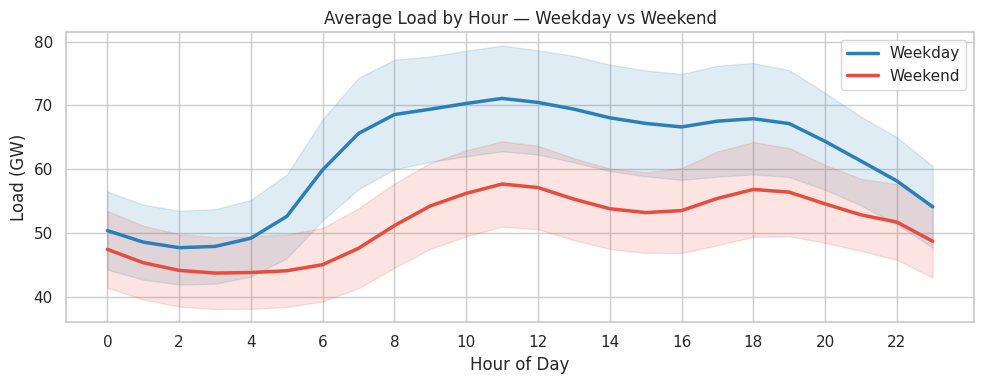

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
for is_wknd, label, color in [(False, "Weekday", "#2980b9"), (True, "Weekend", "#e74c3c")]:
    grp  = df[df["is_weekend"] == is_wknd].groupby("hour")[TARGET]
    mean = grp.mean() / 1000
    std  = grp.std()  / 1000
    ax.plot(mean.index, mean.values, label=label, color=color, lw=2.5)
    ax.fill_between(mean.index, mean - std, mean + std, alpha=0.15, color=color)
ax.set(title="Average Load by Hour — Weekday vs Weekend",
       xlabel="Hour of Day", ylabel="Load (GW)")
ax.set_xticks(range(0, 24, 2))
ax.legend()
plt.tight_layout()
plt.show()

There more usage during the Weekday than Weekend. 

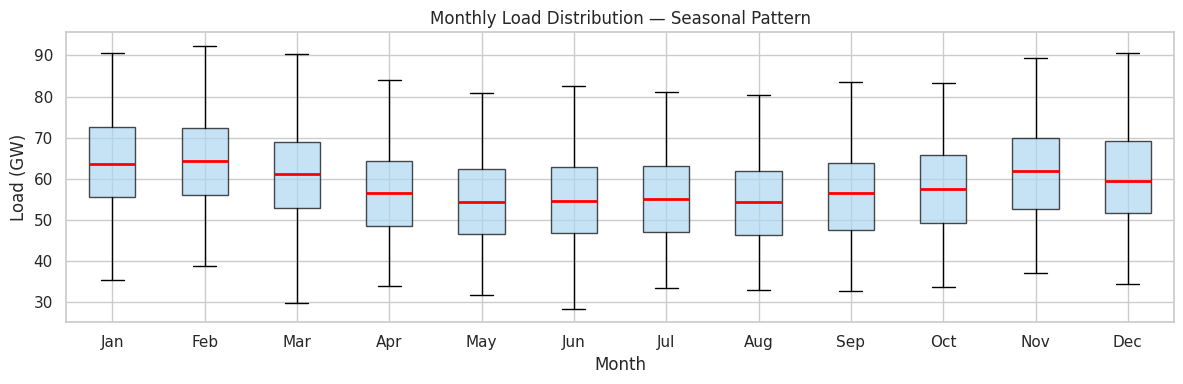

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
month_data = [df[df["month"] == m][TARGET].dropna().values / 1000 for m in range(1, 13)]
ax.boxplot(month_data, labels=MONTH_NAMES, showfliers=False,
           medianprops=dict(color="red", lw=2),
           patch_artist=True,
           boxprops=dict(facecolor="#aed6f1", alpha=0.7))
ax.set(title="Monthly Load Distribution — Seasonal Pattern",
       xlabel="Month", ylabel="Load (GW)")
plt.tight_layout()
plt.show()

This is the similar insights about the seasonality we have received before. 

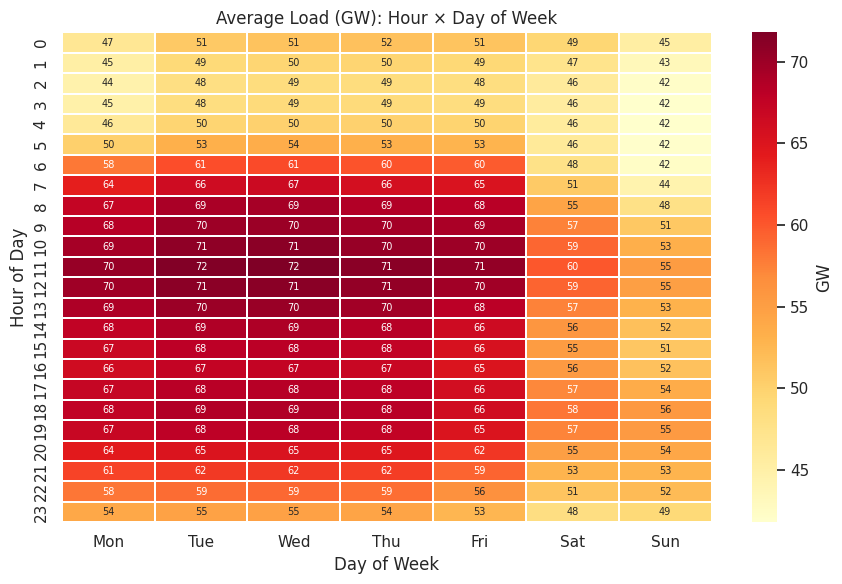

In [19]:
fig, ax = plt.subplots(figsize=(9, 6))
pivot = df.groupby(["hour", "day_of_week"])[TARGET].mean().unstack() / 1000
pivot.columns = DAY_NAMES
sns.heatmap(pivot, ax=ax, cmap="YlOrRd", fmt=".0f", annot=True,
            annot_kws={"size": 7}, linewidths=0.3, cbar_kws={"label": "GW"})
ax.set(title="Average Load (GW): Hour × Day of Week",
       xlabel="Day of Week", ylabel="Hour of Day")
plt.tight_layout()
plt.show()

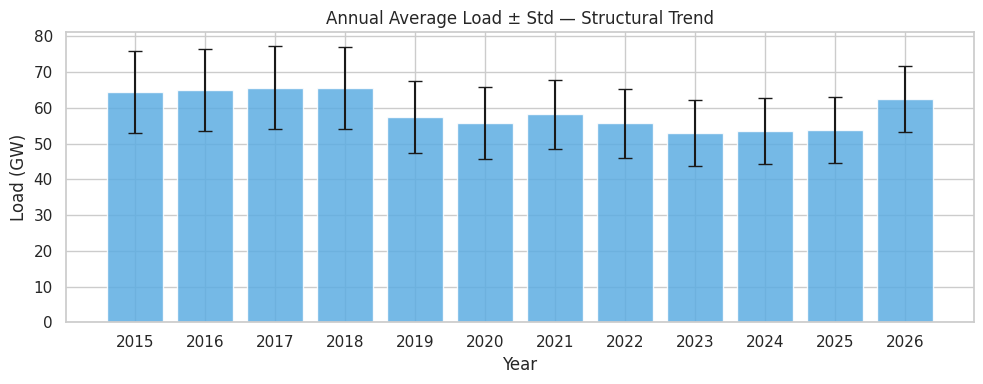

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
annual = df.groupby("year")[TARGET].agg(["mean", "std"]) / 1000
ax.bar(annual.index, annual["mean"], yerr=annual["std"],
       color="#5dade2", edgecolor="white", capsize=5, alpha=0.85)
ax.set(title="Annual Average Load ± Std — Structural Trend",
       xlabel="Year", ylabel="Load (GW)")
ax.set_xticks(annual.index)
plt.tight_layout()
plt.show()

This shows there is a structural shift from 2019 onwards.

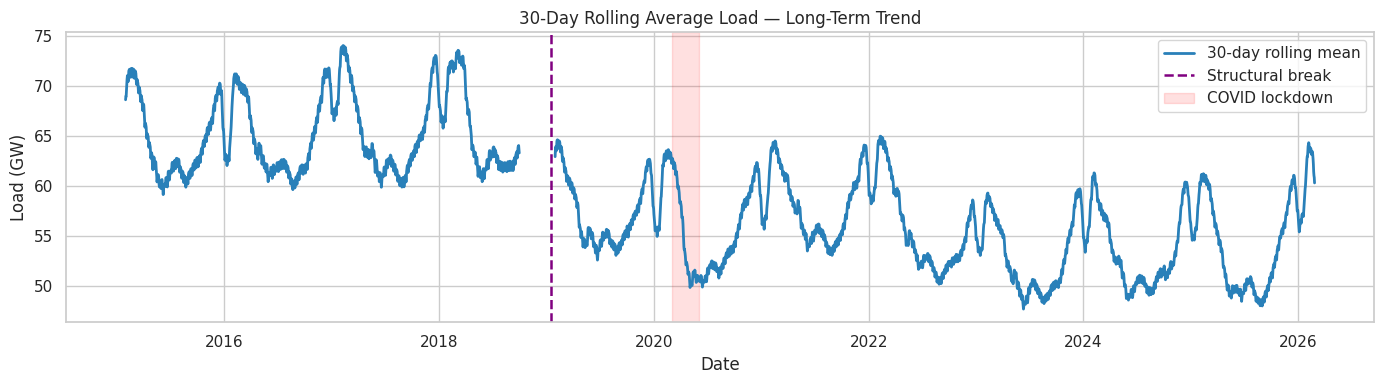

In [21]:
fig, ax = plt.subplots(figsize=(14, 4))
daily = df[TARGET].resample("D").mean() / 1000
ax.plot(daily.rolling(30).mean(), color="#2980b9", lw=2, label="30-day rolling mean")
ax.axvline(pd.Timestamp("2019-01-15"), color="purple", lw=1.8,
           ls="--", label="Structural break")
ax.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2020-06-01"),
           alpha=0.12, color="red", label="COVID lockdown")
ax.set(title="30-Day Rolling Average Load — Long-Term Trend",
       xlabel="Date", ylabel="Load (GW)")
ax.legend()
plt.tight_layout()
plt.show()

This shows everything, the missing values in 2018 end, Structural shift after 2019 and also the dip during the COVID lockdown. 

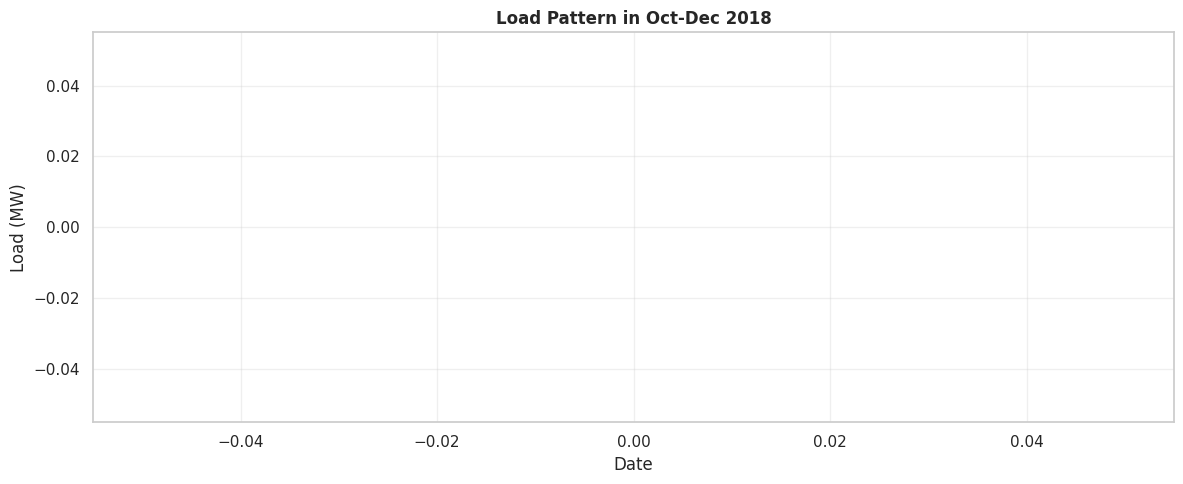

In [22]:
df_2018 = df[df.index.year == 2018]
df_2018_oct_dec = df_2018[df_2018.index.month.isin([10, 11, 12])]
plt.figure(figsize=(12, 5))
plt.plot(df_2018_oct_dec.index, df_2018_oct_dec[TARGET], label='2018')  
plt.title("Load Pattern in Oct-Dec 2018", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.grid(alpha=0.3)
plt.tight_layout()      
plt.show()

This confirms there is no data available in the month of oct - dec 2018 

In [23]:
df_2018['actual_load'].isnull().sum() == df['actual_load'].isnull().sum()

np.True_

We have a huge data missing in 2018  and all the null values in TARGET is in 2018. So it is better to filter it out. 

we are filtering the data from Jan 2019 onwards due to structural break + missing Oct-Dec 2018

In [24]:
df = df[df.index >= '2019-01-01'].copy()

In [25]:
df.shape

(249453, 94)

### Drop the columns with 40 % missing rate

In [26]:
threshold = 0.40
cols_to_drop = df[df.columns[df.isnull().mean() > threshold]].columns
df.drop(columns=cols_to_drop, inplace=True)
df.shape

(249453, 69)

In [27]:
df.isnull().sum().sort_values(ascending=False)

generation_Nuclear_Actual Aggregated          99493
generation_Solar_Actual Consumption           95370
generation_Wind Onshore_Actual Consumption    95370
generation_import_Generation_Nuclear          74622
import_CH                                     67843
                                              ...  
time_of_day                                       0
month                                             0
day_of_week                                       0
year                                              0
is_weekend                                        0
Length: 69, dtype: int64

### For remaining columns with <40% missing, interpolate

In [28]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].interpolate(method='time', limit=None)

In [29]:
df.shape

(249453, 69)

In [30]:
print(df.isnull().sum().sum())

263252


In [31]:
print("NaNs remaining after interpolation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

print(f"\nTotal rows before feature engineering: {len(df)}")

NaNs remaining after interpolation:
generation_Solar_Actual Consumption           73163
generation_Wind Onshore_Actual Consumption    73163
import_NO_2                                   58463
generation_import_Import_NO_2                 58463
dtype: int64

Total rows before feature engineering: 249453


In [32]:
print("Solar NaN locations:")
solar_nulls = df['generation_Solar_Actual Consumption'].isnull()
print(f"  First NaN: {df[solar_nulls].index[0]}")
print(f"  Last NaN: {df[solar_nulls].index[-1]}")

print("\nWind_Onshore_nulls NaN locations:")
Wind_Onshore_nulls = df['generation_Wind Onshore_Actual Consumption'].isnull()
print(f"  First NaN: {df[Wind_Onshore_nulls].index[0]}")
print(f"  Last NaN: {df[Wind_Onshore_nulls].index[-1]}")

print("\nimport_NO_2 NaN locations:")
no2_nulls = df['import_NO_2'].isnull()
print(f"  First NaN: {df[no2_nulls].index[0]}")
print(f"  Last NaN: {df[no2_nulls].index[-1]}")

print("\ngeneration_import_Import_NO_2 NaN locations:")
import_no2_nulls = df['generation_import_Import_NO_2'].isnull()
print(f"  First NaN: {df[import_no2_nulls].index[0]}")
print(f"  Last NaN: {df[import_no2_nulls].index[-1]}")

Solar NaN locations:
  First NaN: 2019-01-01 00:00:00+01:00
  Last NaN: 2021-02-03 01:00:00+01:00

Wind_Onshore_nulls NaN locations:
  First NaN: 2019-01-01 00:00:00+01:00
  Last NaN: 2021-02-03 01:00:00+01:00

import_NO_2 NaN locations:
  First NaN: 2019-01-01 00:00:00+01:00
  Last NaN: 2020-09-01 23:45:00+02:00

generation_import_Import_NO_2 NaN locations:
  First NaN: 2019-01-01 00:00:00+01:00
  Last NaN: 2020-09-01 23:45:00+02:00


### Dropping the columns which cannot do interpolation 
As the missing values is from the starting of the Dataset 

In [33]:
drop_cols = [
    'generation_Solar_Actual Consumption',
    'generation_Wind Onshore_Actual Consumption',
    'import_NO_2',
    'generation_import_Import_NO_2'
]
df.drop(columns=drop_cols, inplace=True)

In [34]:
df.head()

,actual_load,wind_and_solar_forecast_Solar,wind_and_solar_forecast_Wind Offshore,wind_and_solar_forecast_Wind Onshore,intraday_wind_and_solar_forecast_Solar,intraday_wind_and_solar_forecast_Wind Offshore,intraday_wind_and_solar_forecast_Wind Onshore,generation_Biomass_Actual Aggregated,generation_Fossil Brown coal/Lignite_Actual Aggregated,generation_Fossil Gas_Actual Aggregated,...,generation_import_Import_BE,import_AT,generation_import_Import_AT,hour,minute,time_of_day,month,day_of_week,year,is_weekend
2019-01-01 00:00:00+01:00,44461.48,0.0,5042.14,18224.16,0.0,3985.90,18598.02,4739.80,6932.07,3410.34,...,0.00,43.87,43.87,0,0,0.00,1,1,2019,False
2019-01-01 00:15:00+01:00,43913.65,0.0,5060.99,18652.06,0.0,3877.54,19170.96,4744.73,6351.45,3294.88,...,2.91,45.76,43.87,0,15,0.25,1,1,2019,False
2019-01-01 00:30:00+01:00,43380.86,0.0,5078.82,19094.69,0.0,3540.13,19587.50,4757.20,6220.82,3228.20,...,0.00,47.65,43.87,0,30,0.50,1,1,2019,False
2019-01-01 00:45:00+01:00,43131.04,0.0,5093.65,19548.25,0.0,3592.71,19819.08,4778.22,5835.97,3194.40,...,0.00,49.54,43.87,0,45,0.75,1,1,2019,False
2019-01-01 01:00:00+01:00,42824.86,0.0,5112.48,19999.29,0.0,3907.11,20368.57,4764.74,5470.81,3071.16,...,6.24,51.43,51.43,1,0,1.00,1,1,2019,False


##  Outlier Removal

In [35]:
df.shape

(249453, 65)

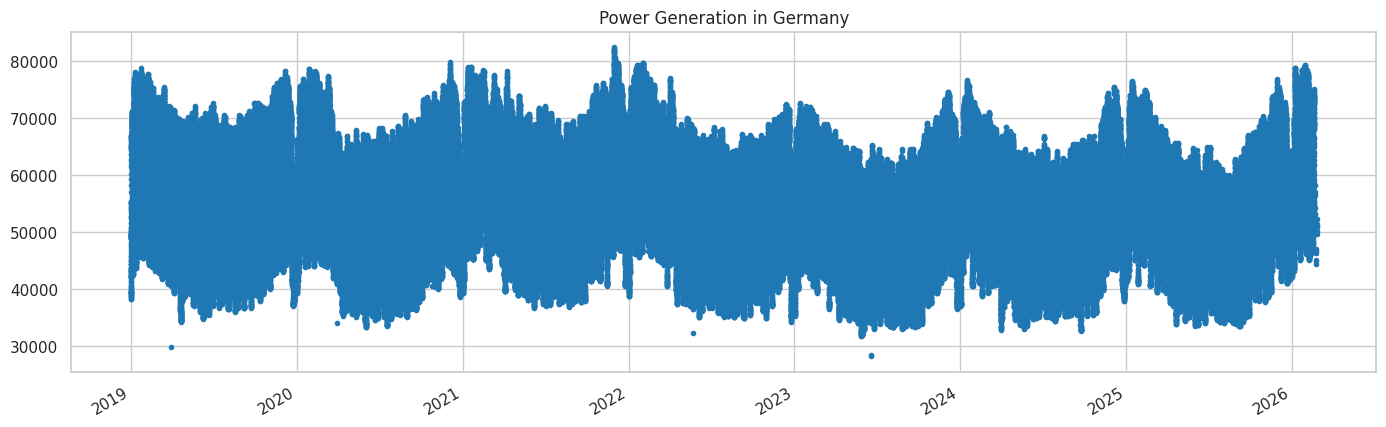

In [36]:
df['actual_load'].plot(style='.',
       figsize=(15,5),
    color=color_pal[0],
    title= 'Power Generation in Germany')

plt.show()

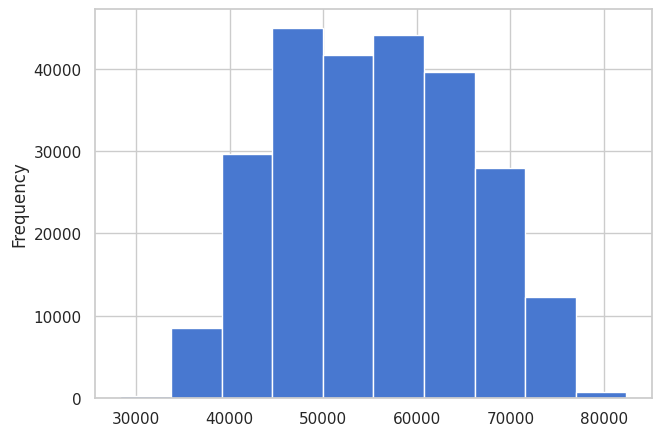

In [37]:
df['actual_load'].plot(kind='hist')
plt.show()

<Axes: >

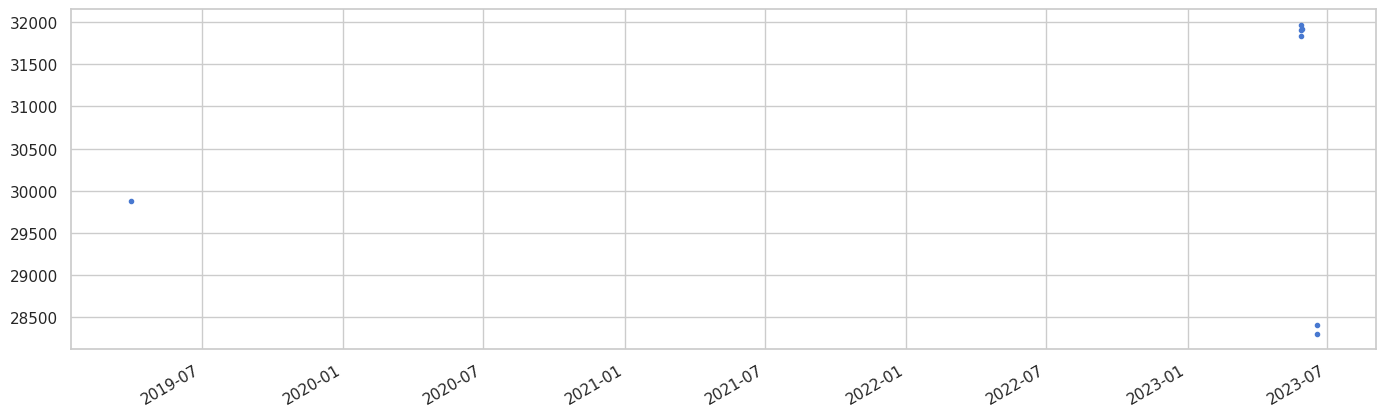

In [38]:
df.query('actual_load< 32_000')['actual_load'].plot(figsize=(15,5), style='.')

In [39]:
df = df.query('actual_load>32_000').copy()

### Feature Engineering

In [40]:
def feature_engineering(df):


    
    df['quarter'] = df.index.quarter
    df['day_of_year'] = df.index.dayofyear
    df['week_of_year'] = df.index.isocalendar().week.astype(int)

    # Hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Day of week
    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Month
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    de_holidays = holidays.Germany(years=range(2019, 2027))

 
    df_dates = df.index.date  

    df['is_holiday'] = pd.Series([d in de_holidays for d in df_dates], index=df.index).astype(int)

    df['is_holiday_eve'] = pd.Series([(d - pd.Timedelta(days=1).to_pytimedelta()) in de_holidays for d in df_dates],index=df.index).astype(int)

    
    # Previous day same time
    df['lag_96']  = df[TARGET].shift(96)   # 1 day ago

    # Previous 2 days
    df['lag_192'] = df[TARGET].shift(192)  # 2 days ago

    # Previous week same time — usually strongest single lag
    df['lag_672'] = df[TARGET].shift(672)  # 1 week ago

    # Previous 2 weeks
    df['lag_1344'] = df[TARGET].shift(1344) # 2 weeks ago

    # Recent lags (last few 15-min intervals)
    df['lag_1'] = df[TARGET].shift(1)   # 15 mins ago
    df['lag_4'] = df[TARGET].shift(4)   # 1 hour ago
    df['lag_8'] = df[TARGET].shift(8)   # 2 hours ago


    # Shift by 96 first to avoid data leakage
    df['rolling_mean_24h'] = df[TARGET].shift(96).rolling(96).mean()
    df['rolling_std_24h']  = df[TARGET].shift(96).rolling(96).std()
    df['rolling_min_24h']  = df[TARGET].shift(96).rolling(96).min()
    df['rolling_max_24h']  = df[TARGET].shift(96).rolling(96).max()

    df['rolling_mean_7d']  = df[TARGET].shift(96).rolling(672).mean()
    df['rolling_std_7d']   = df[TARGET].shift(96).rolling(672).std()


    # Hour x weekend interaction
    df['hour_x_weekend'] = df['hour'] * df['is_weekend']

    # Hour x month interaction (captures seasonal intraday patterns)
    df['hour_x_month'] = df['hour'] * df['month']

    gen_cols = [
    'generation_Nuclear_Actual Aggregated',	
    'generation_import_Generation_Nuclear',
    'import_CH',
    'import_NL',
    'import_AT',
    'import_DK_1',
    'import_DK_2',
    'generation_Hydro Water Reservoir_Actual Aggregated',
    'generation_Waste_Actual Aggregated'
    ]

    # Lag these too to avoid leakage
    for col in gen_cols:
        df[f'{col}_lag_96'] = df[col].shift(96)


    df.dropna(inplace=True)

    return df

In [41]:

feature_engineering(df)

,actual_load,wind_and_solar_forecast_Solar,wind_and_solar_forecast_Wind Offshore,wind_and_solar_forecast_Wind Onshore,intraday_wind_and_solar_forecast_Solar,intraday_wind_and_solar_forecast_Wind Offshore,intraday_wind_and_solar_forecast_Wind Onshore,generation_Biomass_Actual Aggregated,generation_Fossil Brown coal/Lignite_Actual Aggregated,generation_Fossil Gas_Actual Aggregated,...,hour_x_month,generation_Nuclear_Actual Aggregated_lag_96,generation_import_Generation_Nuclear_lag_96,import_CH_lag_96,import_NL_lag_96,import_AT_lag_96,import_DK_1_lag_96,import_DK_2_lag_96,generation_Hydro Water Reservoir_Actual Aggregated_lag_96,generation_Waste_Actual Aggregated_lag_96
2019-01-15 00:00:00+01:00,56575.980000,0.0,5019.02,24881.41000,0.0,4988.42,24865.32000,4668.42000,10465.64000,5451.90000,...,0,7418.60,7418.60,434.3900,0.00000,9.4500,0.0,0.000,228.6900,726.2900
2019-01-15 00:15:00+01:00,56018.680000,0.0,5027.68,24865.07000,0.0,5099.41,24910.74000,4679.49000,10505.57000,5169.69000,...,0,7409.75,7409.75,440.9725,0.00000,11.1325,0.0,0.000,207.4900,723.4600
2019-01-15 00:30:00+01:00,55498.760000,0.0,5030.33,24862.11000,0.0,5194.52,24944.90000,4685.38000,10477.92000,5171.87000,...,0,7350.23,7350.23,447.5550,0.00000,12.8150,0.0,0.000,152.5100,721.2200
2019-01-15 00:45:00+01:00,55099.170000,0.0,4918.98,24865.05000,0.0,5220.60,24758.65000,4667.98000,10381.50000,5251.88000,...,0,7311.68,7311.68,454.1375,0.00000,14.4975,0.0,0.000,143.3100,734.4200
2019-01-15 01:00:00+01:00,54237.650000,0.0,4923.64,24876.69000,0.0,5247.93,24601.40000,4666.66000,9961.78000,5498.47000,...,1,7219.45,7219.45,460.7200,0.00000,16.1800,0.0,0.000,236.5200,721.6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-24 00:15:00+01:00,50272.859150,0.0,4456.38,26304.87111,0.0,4281.68,25226.88331,4047.02068,9335.39671,7393.63533,...,0,50.73,0.00,0.0000,2.61100,201.4838,0.0,0.218,121.7230,778.7932
2026-02-24 00:30:00+01:00,49671.233480,0.0,4207.45,25684.04048,0.0,4090.52,24453.95292,4050.71768,9439.26393,7383.19937,...,0,50.73,0.00,0.0000,191.85133,200.3285,0.0,0.000,44.2609,772.1098
2026-02-25 00:00:00+01:00,52329.732770,0.0,3069.23,3174.38786,0.0,2856.42,3620.07986,4196.95478,11404.23397,13565.34948,...,0,50.73,0.00,0.0000,47.01499,184.9230,0.0,0.336,88.2904,784.0798
2026-02-25 00:15:00+01:00,51366.956040,0.0,3025.29,3165.80637,0.0,2808.62,3684.87193,4181.87288,11399.81747,13107.68960,...,0,50.73,0.00,0.0000,229.27267,191.3450,0.0,0.610,79.8319,784.1339


### Dropping columns where there is low corelation 

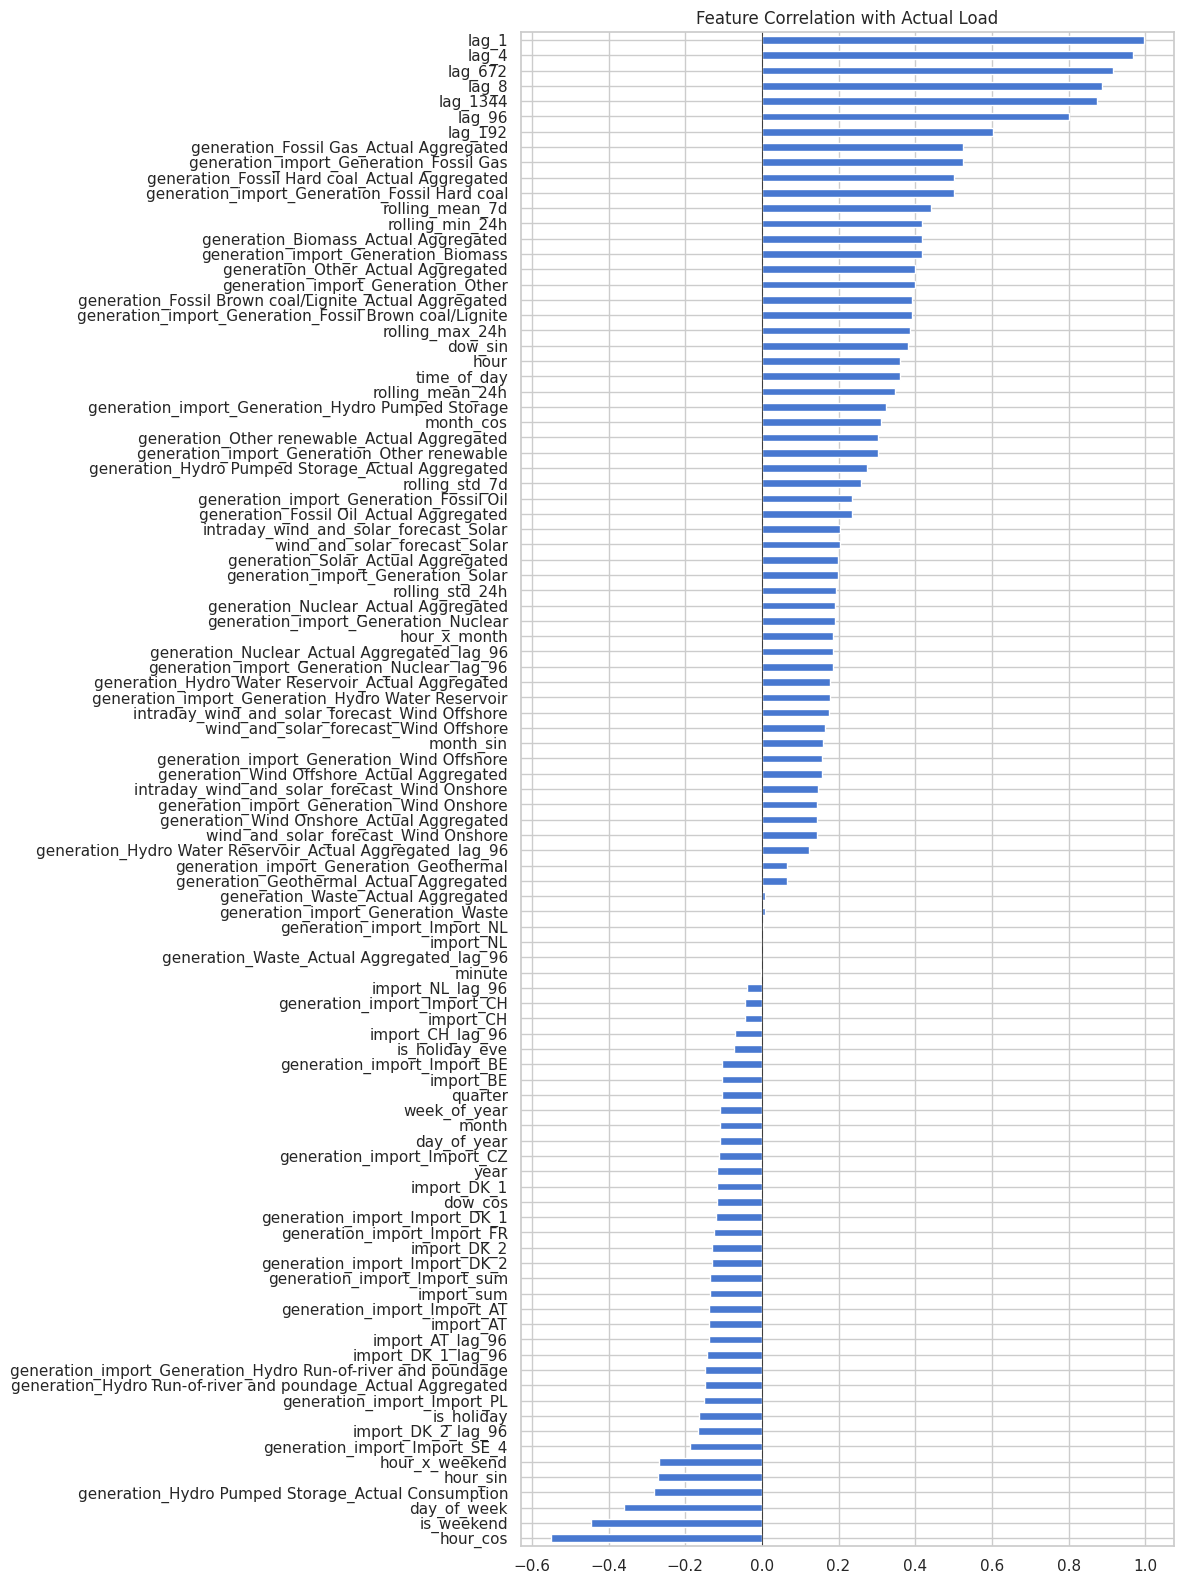

Top 10 positively correlated:
generation_Fossil Hard coal_Actual Aggregated    0.501553
generation_import_Generation_Fossil Gas          0.525721
generation_Fossil Gas_Actual Aggregated          0.525732
lag_192                                          0.601741
lag_96                                           0.801766
lag_1344                                         0.875154
lag_8                                            0.887988
lag_672                                          0.915183
lag_4                                            0.968587
lag_1                                            0.997603
Name: actual_load, dtype: float64

Top 10 negatively correlated:
hour_cos                                             -0.550447
is_weekend                                           -0.446144
day_of_week                                          -0.360631
generation_Hydro Pumped Storage_Actual Consumption   -0.281370
hour_sin                                             -0.272208
hour_x_wee

In [42]:
# Correlation of all features with TARGET
corr = df.corr()[TARGET].drop(TARGET).sort_values()

plt.figure(figsize=(12, 16))
corr.plot(kind='barh', figsize=(12, 16))
plt.title('Feature Correlation with Actual Load')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print top and bottom correlators
print("Top 10 positively correlated:")
print(corr.tail(10))
print("\nTop 10 negatively correlated:")
print(corr.head(10))

In [43]:
corr_full = df.corr()[TARGET].drop(TARGET).dropna().sort_values()

# Feature strength summary
print(f"Total features: {len(corr_full)}")
print(f"Strong (>0.3 abs):   {(corr_full.abs() > 0.3).sum()}")
print(f"Moderate (0.1-0.3):  {((corr_full.abs() >= 0.1) & (corr_full.abs() <= 0.3)).sum()}")
print(f"Weak (<0.1 abs):     {(corr_full.abs() < 0.1).sum()}")

# Weak features — candidates to drop
weak = corr_full[corr_full.abs() < 0.05]
print(f"\nVery weak features (<0.05 correlation):")
print(weak)

Total features: 99
Strong (>0.3 abs):   31
Moderate (0.1-0.3):  55
Weak (<0.1 abs):     13

Very weak features (<0.05 correlation):
import_CH                                   -0.044866
generation_import_Import_CH                 -0.043238
import_NL_lag_96                            -0.039363
minute                                      -0.002232
generation_Waste_Actual Aggregated_lag_96   -0.000713
import_NL                                   -0.000307
generation_import_Import_NL                  0.003603
generation_import_Generation_Waste           0.007594
generation_Waste_Actual Aggregated           0.008212
Name: actual_load, dtype: float64


In [44]:
weak_all = corr_full[corr_full.abs() < 0.1].sort_values()
print("All weak features (<0.1 correlation):")
print(weak_all)

All weak features (<0.1 correlation):
is_holiday_eve                              -0.073177
import_CH_lag_96                            -0.069075
import_CH                                   -0.044866
generation_import_Import_CH                 -0.043238
import_NL_lag_96                            -0.039363
minute                                      -0.002232
generation_Waste_Actual Aggregated_lag_96   -0.000713
import_NL                                   -0.000307
generation_import_Import_NL                  0.003603
generation_import_Generation_Waste           0.007594
generation_Waste_Actual Aggregated           0.008212
generation_Geothermal_Actual Aggregated      0.065478
generation_import_Generation_Geothermal      0.065478
Name: actual_load, dtype: float64


In [45]:
drop_features = [
    'minute',
    'import_NL',
    'import_NL_lag_96',
    'import_CH',
    'import_CH_lag_96',
    'generation_import_Import_CH',
    'generation_import_Import_NL',
    'generation_Waste_Actual Aggregated',
    'generation_Waste_Actual Aggregated_lag_96',
    'generation_import_Generation_Waste',
    'generation_Geothermal_Actual Aggregated',
    'generation_import_Generation_Geothermal',
]

df.drop(columns=drop_features, inplace=True)
print(f"Final features: {df.shape[1]}")

Final features: 88


### Preprocessing for SARIMA

In [46]:
df_sarima = df[TARGET].resample('h').mean()
print(df_sarima.shape)

(62353,)


ADF Statistic: -18.2639
p-value: 0.0000


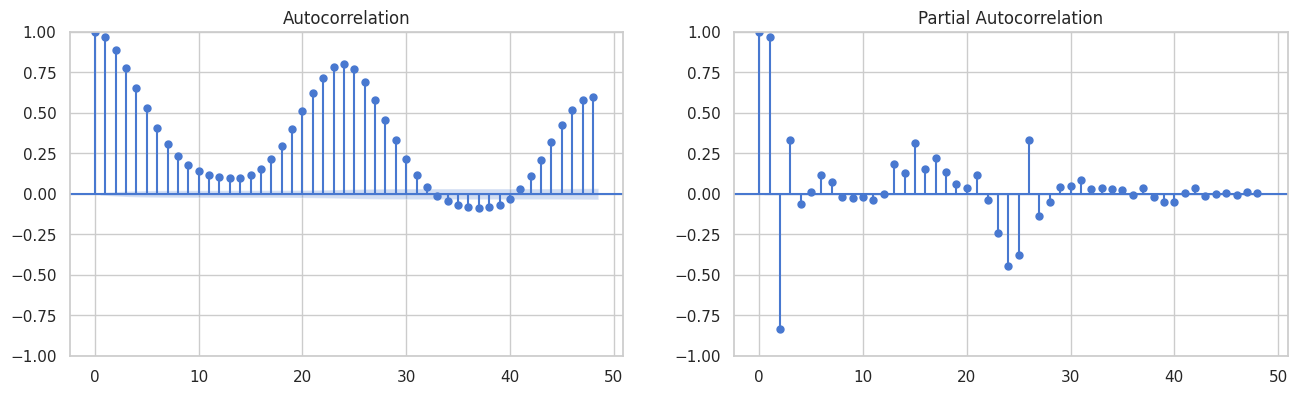

In [47]:
result = adfuller(df_sarima.dropna())
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')
# p-value < 0.05 means stationary — no differencing needed (d=0)
# p-value > 0.05 means non-stationary — need d=1

# Plot ACF and PACF to find p and q
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_sarima.dropna(), lags=48, ax=axes[0])
plot_pacf(df_sarima.dropna(), lags=48, ax=axes[1])
plt.show()

# Train - test split 

In [48]:
df_sarima.isnull().sum()

np.int64(322)

In [49]:


# Train/test split — last 1 months as test
train_sarima = df_sarima['2025-09-01':'2025-12-31']  # 4 months
train_sarima = train_sarima.interpolate(method='time', limit=None)
train_sarima = train_sarima.ffill().bfill()
test_sarima  = df_sarima['2026-01-01':] # Jan 2026 onwards
test_sarima = test_sarima.dropna()


order         = (2, 1, 1) 
seasonal_order = (1, 1, 1, 24)


predictions = []
actuals     = []

# Use rolling window — refit every 168 hours (1 week)
refit_frequency = 168  # hours
history = train_sarima.copy()

print(f"Test size: {len(test_sarima)} hours")

for i in range(0, len(test_sarima), 24):  # step 24h at a time
    # Refit model every week
    if i % refit_frequency == 0:
        print(f"Fitting model at step {i}/{len(test_sarima)}...")
        model = SARIMAX(history,
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        fitted_model = model.fit(disp=False)
    
    # Forecast next 24 hours
    forecast = fitted_model.forecast(steps=24)
    
    # Get actual values for this window
    actual_window = test_sarima.iloc[i:i+24]
    
    if len(actual_window) == 0:
        break
        
    predictions.extend(forecast[:len(actual_window)])
    actuals.extend(actual_window.values)
    

    history = pd.concat([history, actual_window])

# Evaluate
predictions = np.array(predictions)
actuals     = np.array(actuals)

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
mae  = np.mean(np.abs(actuals - predictions))

print(f"\nSARIMA Results:")
print(f"  RMSE: {rmse:.0f} MW")
print(f"  MAE:  {mae:.0f} MW")
print(f"  MAPE: {mape:.2f}%")

Test size: 1160 hours
Fitting model at step 0/1160...
Fitting model at step 168/1160...
Fitting model at step 336/1160...
Fitting model at step 504/1160...
Fitting model at step 672/1160...
Fitting model at step 840/1160...
Fitting model at step 1008/1160...

SARIMA Results:
  RMSE: 6668 MW
  MAE:  4742 MW
  MAPE: 7.93%


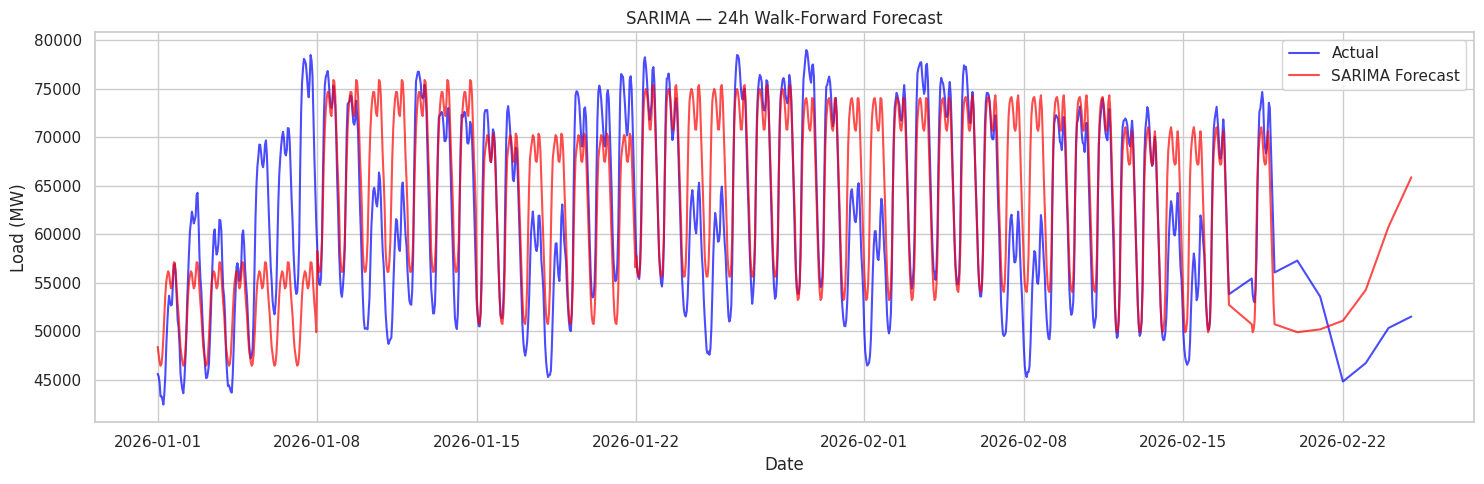

In [50]:

plt.figure(figsize=(15, 5))
plt.plot(test_sarima.index[:len(actuals)], actuals, 
         label='Actual', color='blue', alpha=0.7)
plt.plot(test_sarima.index[:len(predictions)], predictions, 
         label='SARIMA Forecast', color='red', alpha=0.7)
plt.title('SARIMA — 24h Walk-Forward Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.tight_layout()
plt.show()

SARIMA Findings:
- Attempted SARIMAX(2,1,1)(1,1,1,24) on hourly data
- MemoryError: Cannot allocate 1.1GB for Kalman smoother
  with full training data (43,800+ hours)
- SARIMA is designed for small datasets (<5,000 rows)
- Not suitable for high-frequency energy data at scale
